In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/sentiment anaylsis/movie.csv")

In [4]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
data=data[:5000]
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
column_name=['Review','Sentiment']
data.columns=column_name

In [7]:
data.head()

,Review,Sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [8]:
data['Sentiment'].value_counts()

0    2582
1    2418
Name: Sentiment, dtype: int64

In [9]:
x=data["Review"]
y=data["Sentiment"]

In [10]:
import string

In [11]:
punc=string.punctuation

In [12]:
from spacy.lang.en.stop_words import STOP_WORDS

In [13]:
stopwords=list(STOP_WORDS)

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

def text_cleaner(sentence):
    doc=nlp(sentence)
    
    tokens=[]
    for token in doc:
        if token.lemma_!="-PRON-":
            temp=token.lemma_.lower().strip()
        else:
            temp=token.lower_
        tokens.append(temp)
        
    cleaned_tokens=[]
    for token in tokens:
        if token not in stopwords and token not in punc:
            cleaned_tokens.append(token)
    return cleaned_tokens
    
        

In [15]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [16]:
tfidf=TfidfVectorizer(tokenizer=text_cleaner)

In [17]:
from xgboost import XGBClassifier
clf=XGBClassifier()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
x_train.shape

(3500,)

In [22]:
clf=Pipeline([('tfidf',tfidf),('clf',clf)])

In [23]:

clf.fit(x_train,y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_cleaner at 0x7faed7b653b0>)),
                ('clf', XGBClassifier())])

In [24]:
import pickle
filename = 'MSA.sav'
pickle.dump(clf, open(filename, 'wb'))

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
y_pred=clf.predict(x_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[616, 152],
       [125, 607]])

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       768
           1       0.80      0.83      0.81       732

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



In [29]:
accuracy_score(y_test,y_pred)

0.8153333333333334

In [30]:
clf.score(x_test,y_test)

0.8153333333333334

In [31]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


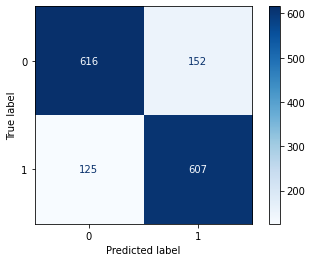

In [32]:
plot_confusion_matrix(clf,x_test,y_test,cmap=plt.cm.Blues)